In [138]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from patsy import dmatrices
from linearmodels.panel import PanelOLS
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.style.use('seaborn')

In [255]:
# Import data for income group categorization
low_inc = pd.read_csv('low_inc.csv')
lower_mid_inc = pd.read_csv('lower_mid_inc.csv')
upper_mid_inc = pd.read_csv('upper_mid_inc.csv')
high_inc = pd.read_csv('high_inc.csv')

low_inc=low_inc['Country Name'].tolist()[:-5] + ['low_inc']
lower_mid_inc = lower_mid_inc['Country Name'].tolist()[:-5] + ['lower_mid_inc']
upper_mid_inc = upper_mid_inc['Country Name'].tolist()[:-5] + ['upper_mid_inc']
high_inc = high_inc['Country Name'].tolist()[:-5] + ['high_inc']

In [256]:
# Cleaning and reshaping ICT data
ICT = pd.read_csv('/Users/chenruoyu/Desktop/DB project data/ICT.csv')

ICT=ICT.rename(columns={'2004 [YR2004]':2004,'2005 [YR2005]':2005,'2006 [YR2006]':2006,'2007 [YR2007]':2007,'2008 [YR2008]':2008,\
                        '2009 [YR2009]':2009,'2010 [YR2010]':2010,'2011 [YR2011]':2011,'2012 [YR2012]':2012,\
                        '2013 [YR2013]':2013,'2014 [YR2014]':2014,'2015 [YR2015]':2015,\
                        '2016 [YR2016]':2016,'2017 [YR2017]':2017,'2018 [YR2018]':2018})
    
for i in ICT.columns[4:]:
    ICT[i]=pd.to_numeric(ICT[i],errors='coerce')
    
ICT.drop(['Country Code','Series Code'],axis=1, inplace=True)
ICT.drop(ICT.index[-195:],inplace=True)

In [257]:
ICT.set_index(['Country Name', 'Series Name'],inplace=True)
ICT.columns.rename('year',inplace=True)
ICT=ICT.stack().swaplevel(1,2).unstack()

In [258]:
ICT=ICT.dropna()
ICT['Secure Internet servers (per 1 million people)']=np.log(ICT['Secure Internet servers (per 1 million people)']+1)

In [259]:
for i in [low_inc, lower_mid_inc, upper_mid_inc, high_inc]:
    ICT.loc[ICT.index.get_level_values('Country Name').isin(i),'inc_group']=i[-1]

In [260]:
# Cleaning and reshaping governance indicators data
WGI = pd.read_csv('/Users/chenruoyu/Desktop/DB project data/WGI2.csv')

WGI=WGI.rename(columns={'2004 [YR2004]':2004,'2005 [YR2005]':2005,'2006 [YR2006]':2006,'2007 [YR2007]':2007,'2008 [YR2008]':2008,
                        '2009 [YR2009]':2009,'2010 [YR2010]':2010,'2011 [YR2011]':2011,'2012 [YR2012]':2012,
                        '2013 [YR2013]':2013,'2014 [YR2014]':2014,'2015 [YR2015]':2015,
                        '2016 [YR2016]':2016,'2017 [YR2017]':2017,'2018 [YR2018]':2018})
for i in WGI.columns[4:]:
    WGI[i]=pd.to_numeric(WGI[i],errors='coerce')

WGI=WGI.drop(['Country Code','Series Code'],axis=1)
WGI=WGI.set_index(['Country Name','Series Name'])
WGI.columns.rename('year',inplace=True)
WGI=WGI.stack().swaplevel(1,2).unstack()

In [261]:
# Merging ICT and WGI data
ICT.index.rename(['country_name','time'],inplace=True)
WGI_ICT=WGI.merge(ICT, how='left', left_index=True, right_on=['country_name','time'])
WGI_ICT = WGI_ICT.swaplevel(0,1)

In [262]:
# New dataframe for the cleaned data
df=WGI_ICT.dropna()

In [263]:
df=df.rename(columns={'Control of Corruption: Estimate':'corruption','Government Effectiveness: Estimate':'effectiveness',
                  'Political Stability and Absence of Violence/Terrorism: Estimate':'stability','Regulatory Quality: Estimate':'regulation',
                  'Rule of Law: Estimate':'law','Voice and Accountability: Estimate':'voice','Fixed broadband subscriptions (per 100 people)':'broadband',
                  'ICT service exports (BoP, current US$)':'export','Individuals using the Internet (% of population)':'user',
                  'Mobile cellular subscriptions (per 100 people)':'mobile','Secure Internet servers (per 1 million people)':'server'})

In [264]:
df

,Series Name,corruption,effectiveness,stability,regulation,law,voice,broadband,user,mobile,server,inc_group
time,country_name,,,,,,,,,,,
2010,Afghanistan,-1.635723,-1.454683,-2.579152,-1.532861,-1.845436,-1.404468,0.005140,4.000000,35.003127,0.391833,low_inc
2012,Afghanistan,-1.419888,-1.360140,-2.418561,-1.193118,-1.643165,-1.267430,0.004814,5.454545,49.227977,0.797263,low_inc
2013,Afghanistan,-1.436761,-1.384930,-2.519349,-1.193137,-1.597314,-1.240068,0.004648,5.900000,52.083576,0.886034,low_inc
2014,Afghanistan,-1.354784,-1.331396,-2.411068,-1.118182,-1.445648,-1.135445,0.004495,7.000000,55.159515,0.996240,low_inc
2015,Afghanistan,-1.341994,-1.322968,-2.571222,-0.997371,-1.504040,-1.117563,0.020535,8.260000,57.271068,1.147502,low_inc
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Zambia,-0.342243,-0.499575,0.156212,-0.503428,-0.236549,-0.109601,0.133255,19.000000,65.681859,1.627469,lower_mid_inc
2015,Zambia,-0.341261,-0.555665,0.151695,-0.436516,-0.229715,-0.066545,0.147298,21.000000,72.784572,1.897280,lower_mid_inc
2016,Zambia,-0.401866,-0.660059,0.142808,-0.483593,-0.300440,-0.306110,0.194238,25.506579,73.438230,2.288606,lower_mid_inc


# Correlation visualization

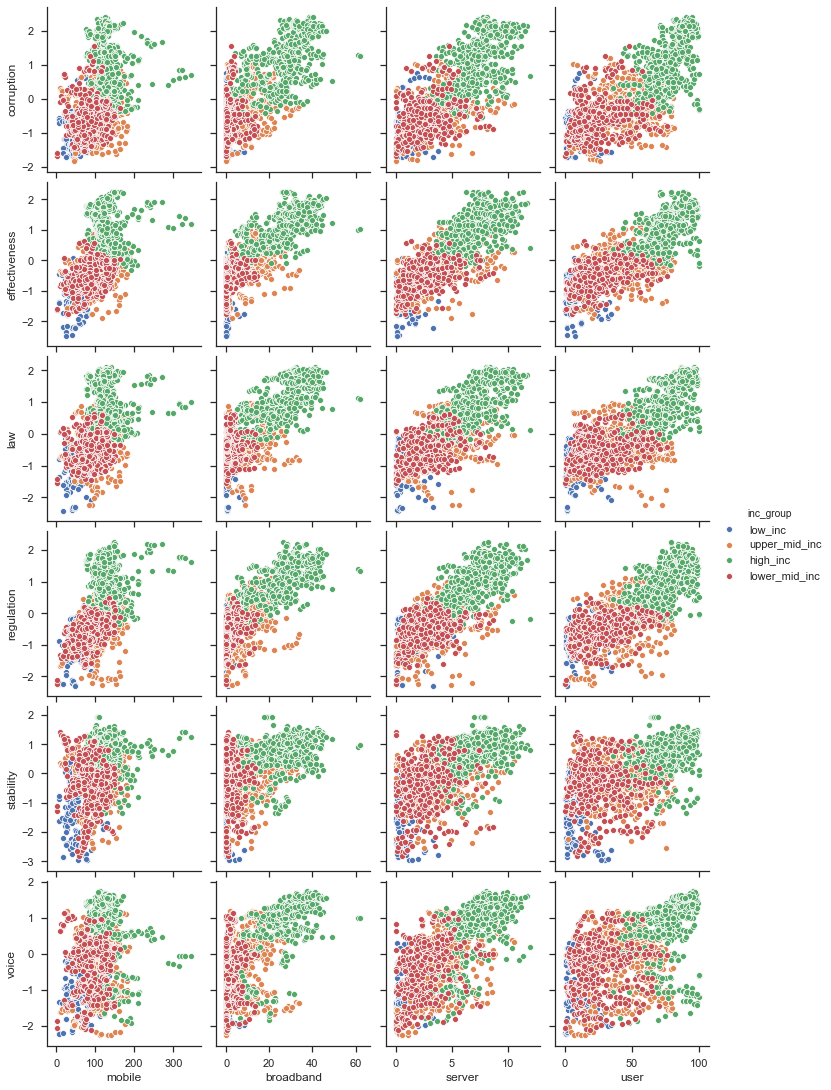

In [44]:
sns.set(style="ticks")
sns.pairplot(df, x_vars=['mobile','broadband','server','user'],
             y_vars = ['corruption','effectiveness', 'law', 'regulation', 'stability', 'voice'],
            hue="inc_group")


# Regression analysis

In [265]:
# Importing, cleaning and shaping control variable data
controls = pd.read_csv('/Users/chenruoyu/Desktop/DB project data/controls.csv')

controls=controls.rename(columns={'2004 [YR2004]':2004,'2005 [YR2005]':2005,'2006 [YR2006]':2006,'2007 [YR2007]':2007,'2008 [YR2008]':2008,\
                        '2009 [YR2009]':2009,'2010 [YR2010]':2010,'2011 [YR2011]':2011,'2012 [YR2012]':2012,\
                        '2013 [YR2013]':2013,'2014 [YR2014]':2014,'2015 [YR2015]':2015,\
                        '2016 [YR2016]':2016,'2017 [YR2017]':2017,'2018 [YR2018]':2018})
    
for i in controls.columns[4:]:
    controls[i]=pd.to_numeric(controls[i],errors='coerce')
    
controls.drop(['Country Code','Series Code'],axis=1, inplace=True)

controls.set_index(['Country Name', 'Series Name'],inplace=True)
controls.columns.rename('year',inplace=True)
controls=controls.fillna(method='ffill',axis=1)
controls=controls.fillna(method='bfill',axis=1)
controls=controls.stack().swaplevel(1,2).unstack()
controls.drop(controls.index[-690:],inplace=True)
controls.index.rename(['country_name','time'],inplace=True)

In [266]:
df=df.merge(controls, how='left', left_index=True, right_on=['time','country_name'])

In [267]:
df.rename(columns={'Depositors with commercial banks (per 1,000 adults)':'depositors',
       'Firms using banks to finance investment (% of firms)':'fin_invest',
       'Firms using banks to finance working capital (% of firms)':'fin_working',
       'GDP per capita (current US$)':'GDP_pc',
       'Literacy rate, adult total (% of people ages 15 and above)':'literacy'},inplace=True)

In [268]:
df

Series Name        corruption  effectiveness  stability  regulation       law  \
country_name time                                                               
Afghanistan  2010   -1.635723      -1.454683  -2.579152   -1.532861 -1.845436   
             2012   -1.419888      -1.360140  -2.418561   -1.193118 -1.643165   
             2013   -1.436761      -1.384930  -2.519349   -1.193137 -1.597314   
             2014   -1.354784      -1.331396  -2.411068   -1.118182 -1.445648   
             2015   -1.341994      -1.322968  -2.571222   -0.997371 -1.504040   
...                       ...            ...        ...         ...       ...   
Zambia       2014   -0.342243      -0.499575   0.156212   -0.503428 -0.236549   
             2015   -0.341261      -0.555665   0.151695   -0.436516 -0.229715   
             2016   -0.401866      -0.660059   0.142808   -0.483593 -0.300440   
             2017   -0.542213      -0.627568   0.146180   -0.466104 -0.325046   
             2018   -0.656137      -0.559209   0.141994   -0.442611 -0.344939   

Series Name           voice  broadband       user     mobile    server  \
country_name time                                                        
Afghanistan  2010 -1.404468   0.005140   4.000000  35.003127  0.391833   
             2012 -1.267430   0.004814   5.454545  49.227977  0.797263   
             2013 -1.240068   0.004648   5.900000  52.083576  0.886034   
             2014 -1.135445   0.004495   7.000000  55.159515  0.996240   
             2015 -1.117563   0.020535   8.260000  57.271068  1.147502   
...                     ...        ...        ...        ...       ...   
Zambia       2014 -0.109601   0.133255  19.000000  65.681859  1.627469   
             2015 -0.066545   0.147298  21.000000  72.784572  1.897280   
             2016 -0.306110   0.194238  25.506579  73.438230  2.288606   
             2017 -0.335299   0.213082  27.852579  79.736910  3.769644   
             2018 -0.320463   0.249918  14.299997  89.157044  3.742564   

Series Name            inc_group  depositors  fin_invest  fin_working  \
country_name time                                                       
Afghanistan  2010        low_inc  105.114895         1.4          2.5   
             2012        low_inc  165.019173         1.4          2.5   
             2013        low_inc  154.762512         1.4          2.5   
             2014        low_inc  171.691770         2.0          3.9   
             2015        low_inc  179.960775         2.0          3.9   
...                          ...         ...         ...          ...   
Zambia       2014  lower_mid_inc  284.706796        12.2          9.9   
             2015  lower_mid_inc  301.380394        12.2          9.9   
             2016  lower_mid_inc  313.525844        12.2          9.9   
             2017  lower_mid_inc  328.147322        12.2          9.9   
             2018  lower_mid_inc  294.581565        12.2          9.9   

Series Name             GDP_pc  literacy  
country_name time                         
Afghanistan  2010   543.303042  31.74112  
             2012   641.872034  31.74112  
             2013   637.165044  31.74112  
             2014   613.856333  31.74112  
             2015   578.466353  31.74112  
...                        ...       ...  
Zambia       2014  1763.056239  83.00767  
             2015  1337.796315  83.00767  
             2016  1280.578447  83.00767  
             2017  1534.865371  83.00767  
             2018  1539.900158  86.74796  

[1549 rows x 16 columns]

# Regression Analysis

In [269]:
# Setting up dataframe to store regression results
iterables = [['corruption', 'effectiveness', 'stability', 'regulation', 'law', 'voice'],
             ['mobile', 'broadband', 'user', 'server', 'depositors', 'fin_invest', 'GDP_pc', 'literacy']]
index = pd.MultiIndex.from_product(iterables, names=['eng', 'exog'])

In [270]:
# Setting up lists of endogenous and exogenous variables
engs = ['corruption', 'effectiveness', 'law', 'regulation', 'stability', 'voice']
exogs = ['mobile', 'broadband', 'user', 'server', 'depositors', 'fin_invest', 'GDP_pc', 'literacy']

## Treating the data as cross-sectional

In [271]:
reg_results_cs = pd.DataFrame(columns=['params','p_value'], index=index)
for eng in engs:
    y, X = dmatrices( eng + '~  broadband + mobile + user + server + depositors + fin_invest + GDP_pc + literacy ', data=df, return_type='dataframe')
    mod = PanelOLS(y, X, entity_effects=False, time_effects=False)
    res = mod.fit(cov_type='robust')
    
    df[eng+'_cshat'] = res.fitted_values
    df[eng+'_cserror'] = df[eng] - df[eng+'_cshat']

    for i in res.params.index[1:]:
        reg_results_cs.loc[(eng,i),'params']=res.params.loc[i]
        reg_results_cs.loc[(eng,i),'p_value']=res.pvalues.loc[i]
        reg_results_cs.loc[(eng,i),'rsquared']=res.rsquared

for i in reg_results_cs.columns:
    reg_results_cs[i]=pd.to_numeric(reg_results_cs[i])

In [81]:
def heatmap(data, data2, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False, size=1)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    
    # Change the color of the xtick labels to red for exogenous variables with (unexpected) negative coefficients...
    colors = ['red', 'crimson', 'maroon','lightcoral','salmon','red','red','red','red']
    ind=0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data2.iloc[i,j]<0:
                ax.get_yticklabels()[i].set_color(colors[ind])
                ax.get_xticklabels()[j].set_color(colors[ind]) 
                ind+=1
                
    # ...and set italic style for endogenous variables associated with normally distributed errors in their regression. 
            if i==1 or i==2 or i==3:
                ax.get_yticklabels()[i].set_style('italic')

    return im, cbar



def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [82]:
reg_sig = reg_results_cs.loc[reg_results_cs['p_value']<=0.05]
params = pd.pivot_table(reg_sig, values='params', index=['eng'], columns=['exog'])
params=params.fillna(0)
#params['broadband']=0
#params['server']=0
#params.loc['server',params.columns]=0
params = params[exogs]


p_value = pd.pivot_table(reg_results_cs, values='p_value', index=['eng'], columns=['exog'])
p_value=p_value[exogs]

params=params.reindex(p_value.index.tolist())

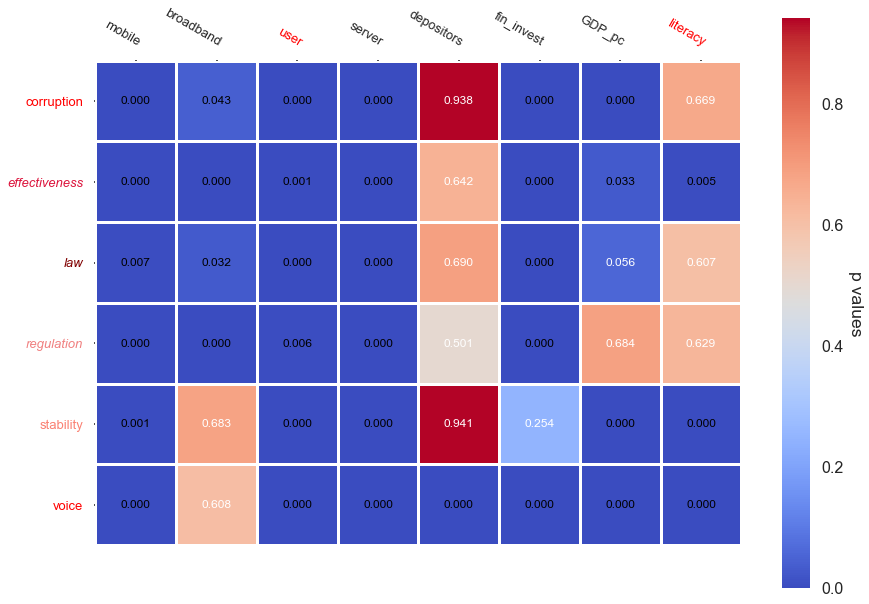

In [88]:
mpl.style.use('seaborn-poster')
fig, ax = plt.subplots()

im, cbar = heatmap(p_value, params, p_value.index.tolist(), p_value.columns.tolist(), ax=ax,
                   cmap="coolwarm", cbarlabel="p values")
texts = annotate_heatmap(im, valfmt="{x:.3f}", threshold = 0.05)

ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=13)


fig.tight_layout()

Text(0.5, 1.0, 'R-Squared for each regression')

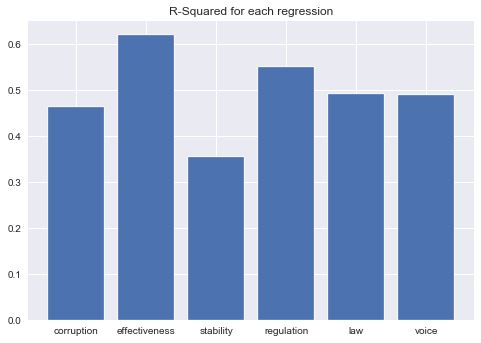

In [299]:
fig, ax = plt.subplots()
ax.bar(reg_results_cs.index.get_level_values('eng'),reg_results_cs.rsquared)
ax.set_title('R-Squared for each regression')

Text(0.5, 1.0, 'voice')

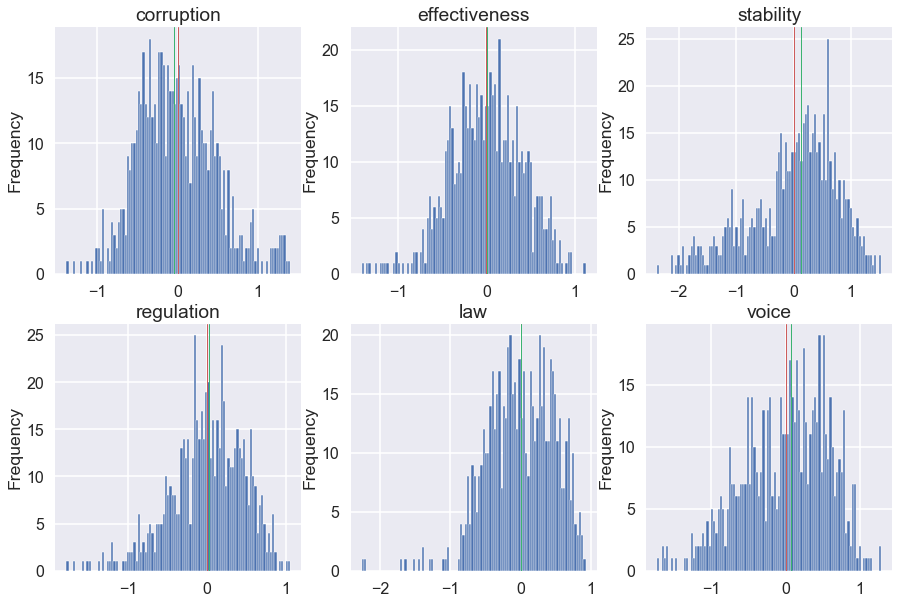

In [106]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
fig.set_size_inches(15,10)

df['corruption_cserror'].plot.hist(bins=100,ax=ax1)
ax1.axvline(df['corruption_cserror'].mean(), color = 'indianred',lw=1)
ax1.axvline(df['corruption_cserror'].median(), color = 'mediumseagreen',lw=1)

df['effectiveness_cserror'].plot.hist(bins=100,ax=ax2)
ax2.axvline(df['effectiveness_cserror'].mean(), color = 'indianred',lw=1)
ax2.axvline(df['effectiveness_cserror'].median(), color = 'mediumseagreen',lw=1)

df['stability_cserror'].plot.hist(bins=100,ax=ax3)
ax3.axvline(df['stability_cserror'].mean(), color = 'indianred',lw=1)
ax3.axvline(df['stability_cserror'].median(), color = 'mediumseagreen',lw=1)

df['regulation_cserror'].plot.hist(bins=100,ax=ax4)
ax4.axvline(df['regulation_cserror'].mean(), color = 'indianred',lw=1)
ax4.axvline(df['regulation_cserror'].median(), color = 'mediumseagreen',lw=1)

df['law_cserror'].plot.hist(bins=100,ax=ax5)
ax5.axvline(df['law_cserror'].mean(), color = 'indianred',lw=1)
ax5.axvline(df['law_cserror'].median(), color = 'mediumseagreen',lw=1)

df['voice_cserror'].plot.hist(bins=100,ax=ax6)
ax6.axvline(df['voice_cserror'].mean(), color = 'indianred',lw=1)
ax6.axvline(df['voice_cserror'].median(), color = 'mediumseagreen',lw=1)


ax1.set_title('corruption')
ax2.set_title('effectiveness')
ax3.set_title('stability')
ax4.set_title('regulation')
ax5.set_title('law')
ax6.set_title('voice')

## Treating the data as panel data and conduct fixed-effect regression

In [293]:
reg_results = pd.DataFrame(columns=['params','p_value'], index=index)
for eng in engs:
    y, X = dmatrices( eng + '~  broadband + mobile + user + server + depositors + fin_invest + GDP_pc + literacy', data=df, return_type='dataframe')
    mod = PanelOLS(y, X, entity_effects=True)
    res = mod.fit(cov_type='robust')

    df[eng+'_hat'] = res.fitted_values
    df[eng+'_error'] = df[eng] - df[eng+'_hat']

    for i in res.params.index[1:]:
        reg_results.loc[(eng,i),'params']=res.params.loc[i]
        reg_results.loc[(eng,i),'p_value']=res.pvalues.loc[i]
        f = str(res.f_statistic_robust)
        reg_results.loc[(eng,i),'f_stat']=float(f[f.find(':',f.find('P-value'))+2:f.find(':',f.find('P-value'))+7])

for i in reg_results.columns:
    reg_results[i]=pd.to_numeric(reg_results[i])

Text(0.5, 1.0, 'voice')

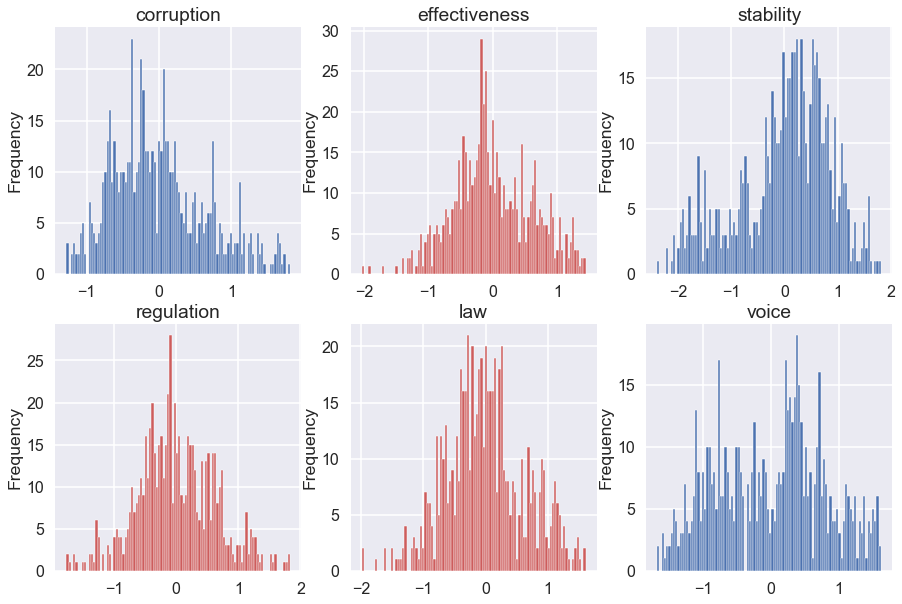

In [121]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
fig.set_size_inches(15,10)
df['corruption_error'].plot.hist(bins=100,ax=ax1)
df['effectiveness_error'].plot.hist(bins=100,ax=ax2, color = 'indianred')
df['stability_error'].plot.hist(bins=100,ax=ax3)
df['regulation_error'].plot.hist(bins=100,ax=ax4, color = 'indianred')
df['law_error'].plot.hist(bins=100,ax=ax5, color = 'indianred')
df['voice_error'].plot.hist(bins=100,ax=ax6)
ax1.set_title('corruption')
ax2.set_title('effectiveness')
ax3.set_title('stability')
ax4.set_title('regulation')
ax5.set_title('law')
ax6.set_title('voice')

In [1374]:
reg_sig = reg_results.loc[reg_results['p_value']<=0.05]
params = pd.pivot_table(reg_sig, values='params', index=['eng'], columns=['exog'])
params=params.fillna(0)
#params['broadband']=0
params['server']=0
params.loc['server',params.columns]=0
params = params[exogs]


p_value = pd.pivot_table(reg_results, values='p_value', index=['eng'], columns=['exog'])
p_value=p_value[exogs]

params=params.reindex(p_value.index.tolist())

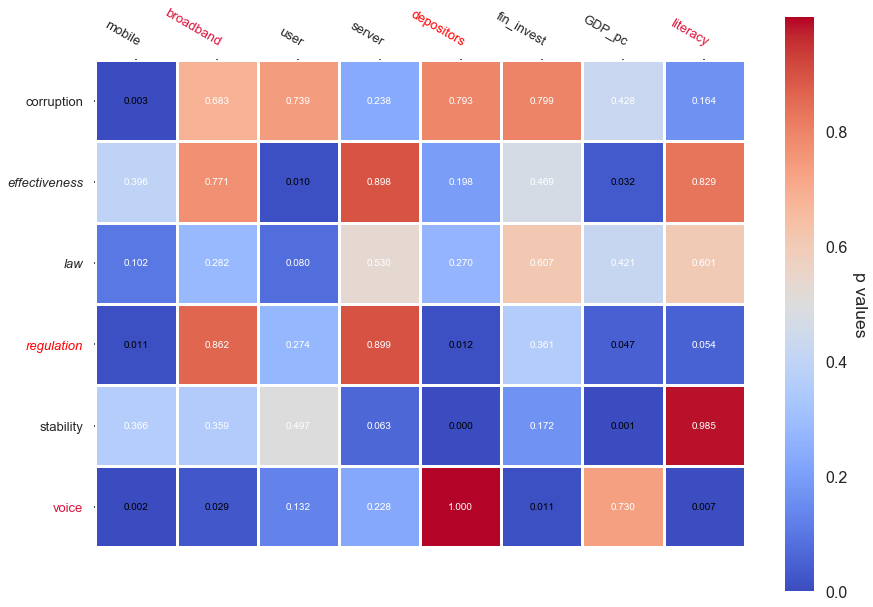

In [1373]:
mpl.style.use('seaborn-poster')
fig, ax = plt.subplots()

im, cbar = heatmap(p_value, params, p_value.index.tolist(), p_value.columns.tolist(), ax=ax,
                   cmap="coolwarm", cbarlabel="p values")
texts = annotate_heatmap(im, valfmt="{x:.3f}", threshold = 0.05)

ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=13)


fig.tight_layout()
